Natural Language Processing (NLP)

In [1]:
# Import required libraries

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import re

In [5]:
import nltk

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
from nltk.corpus import stopwords

In [9]:
from nltk.stem import WordNetLemmatizer

In [10]:
import warnings 
warnings.filterwarnings('ignore')

In [11]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [12]:
from wordcloud import WordCloud

In [13]:
# Download NLTK data files

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saine\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
nltk.download('punkt_tab') 

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\saine\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saine\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saine\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
# Load the dataset

In [19]:
df = pd.read_csv("C:/Users/saine/Downloads/Zaalima Internship/Project_1/Synthetic Data.csv")
print("Dataset Loaded Successfully ")

Dataset Loaded Successfully 


In [20]:
print("Shape:", df.shape)

Shape: (500, 8)


In [21]:
print(df.head())

   TaskID                                              Title  \
0       1       Deployment: Customizable reciprocal function   
1       2  Database Update: Quality-focused contextually-...   
2       3             Testing: Cross-group global time-frame   
3       4    Security: Compatible next generation middleware   
4       5        Design: Realigned upward-trending framework   

                                         Description   CreatedAt     DueDate  \
0  Deployment task involves Action piece improve ...  2025-09-08  2025-10-25   
1  Database Update task involves Share she relate...  2025-08-23  2025-09-06   
2  Testing task involves Everybody life every soo...  2025-08-27  2025-10-12   
3  Security task involves Listen attention mind n...  2025-08-13  2025-10-26   
4  Design task involves Answer certain explain ha...  2025-08-26  2025-10-18   

  Assignee Priority            Label  
0   Martin   Medium       Deployment  
1  Zachary   Medium  Database Update  
2   Edward   Medi

In [22]:
# Combine Title and Description into a single text column

In [23]:
df['text_raw'] = df['Title'].fillna('') + ' ' + df['Description'].fillna('')

In [24]:
# Define text cleaning function

In [25]:
stop_words = set(stopwords.words('english'))

In [26]:
lemmatizer = WordNetLemmatizer()

In [27]:
def clean_text(text):
    text = str(text).lower()                                             # lowercase
    text = re.sub(r"http\S+|www\S+", "", text)                           # remove URLs
    text = re.sub(r"[^a-z\s]", " ", text)                                # keep only alphabets
    tokens = nltk.word_tokenize(text)                                    # tokenize
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]   # stopwords
    tokens = [lemmatizer.lemmatize(t) for t in tokens]                   # lemmatization
    return " ".join(tokens)


In [28]:
# Apply cleaning

In [29]:
df['clean_text'] = df['text_raw'].apply(clean_text)
print("Text preprocessing completed!")

Text preprocessing completed!


In [30]:
# Show before/after sample

In [31]:
print("\nBefore Cleaning Example:")
print(df['text_raw'].iloc[0])
print("\nAfter Cleaning Example:")
print(df['clean_text'].iloc[0])


Before Cleaning Example:
Deployment: Customizable reciprocal function Deployment task involves Action piece improve in off door attorney create itself indicate view.

After Cleaning Example:
deployment customizable reciprocal function deployment task involves action piece improve door attorney create indicate view


In [32]:
# Word count column

In [33]:
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))

In [34]:
# EDA — Word count distribution

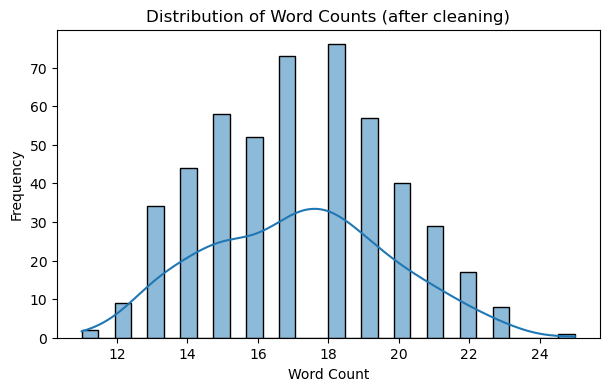

In [35]:
plt.figure(figsize=(7,4))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title("Distribution of Word Counts (after cleaning)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [36]:
# Word cloud of all cleaned text

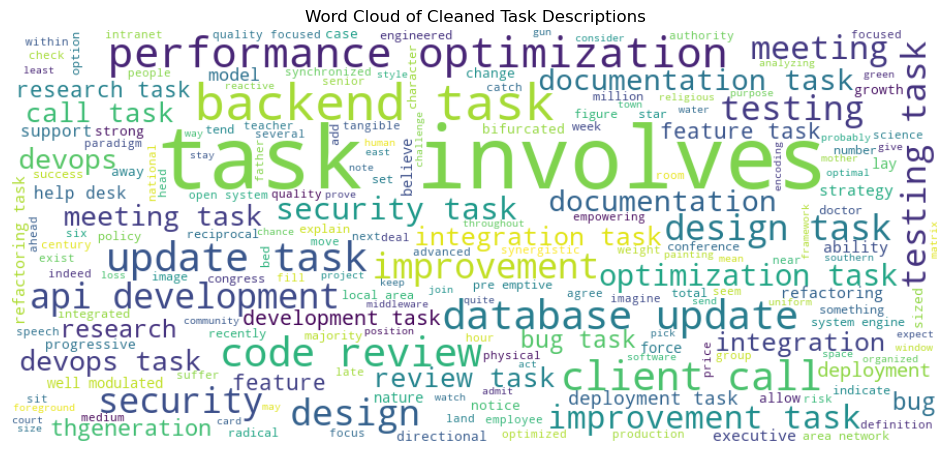

In [37]:
all_text = " ".join(df['clean_text'])
wc = WordCloud(width=900, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Cleaned Task Descriptions")
plt.show()

In [38]:
# Top 20 frequent words 

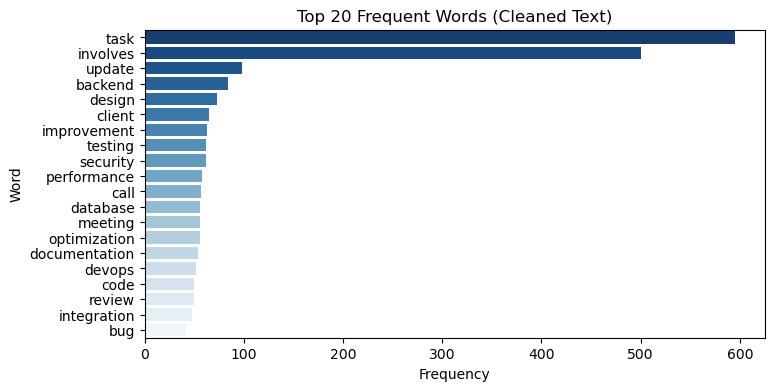

In [39]:
from collections import Counter
word_freq = Counter(" ".join(df['clean_text']).split())
top20 = pd.DataFrame(word_freq.most_common(20), columns=['Word','Frequency'])
plt.figure(figsize=(8,4))
sns.barplot(data=top20, x='Frequency', y='Word', palette='Blues_r')
plt.title("Top 20 Frequent Words (Cleaned Text)")
plt.show()

In [40]:
# Save cleaned dataset

In [41]:
df.to_csv("Cleaned_Synthetic_Data.csv", index=False)
print("Cleaned dataset saved as 'Cleaned_Synthetic_Data.csv'")

Cleaned dataset saved as 'Cleaned_Synthetic_Data.csv'
